# Composite Figure 1: Global Distribution and Temporal Patterns
## Urban Sunset Precipitation Enhancement Study (2001-2020)

### Key Finding: 61.9% of cities globally show sunset precipitation enhancement
### Temporal Stability: Enhancement percentage remarkably stable (58.4%-67.3%) across 20 years

## Load libraries and prepare temporal stability data

In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap
import contextily as ctx
import warnings
warnings.filterwarnings('ignore')

# Table S1 data: Temporal stability of sunset enhancement (2001-2020)
temporal_stability = pd.DataFrame({
    'year': list(range(2001, 2021)),
    'n_cities': [491, 506, 494, 510, 524, 533, 527, 486, 523, 542,
                 500, 530, 494, 491, 504, 500, 509, 487, 515, 514],
    'enhancement_pct': [64.8, 63.0, 61.3, 62.0, 61.4, 59.8, 64.1, 61.7, 60.8, 60.3,
                        59.8, 60.0, 63.0, 58.4, 59.9, 64.6, 63.9, 67.3, 59.0, 63.8]
})

print(f"Average enhancement: {temporal_stability['enhancement_pct'].mean():.1f}%")
print(f"Range: {temporal_stability['enhancement_pct'].min():.1f}% - {temporal_stability['enhancement_pct'].max():.1f}%")
print(f"Standard deviation: {temporal_stability['enhancement_pct'].std():.1f}%")
print(f"City count range: {temporal_stability['n_cities'].min()} - {temporal_stability['n_cities'].max()}")

Average enhancement: 61.9%
Range: 58.4% - 67.3%
Standard deviation: 2.3%
City count range: 486 - 542


## Load temporal pattern data

In [7]:
# Load temporal pattern data
turban_02_05 = np.load(r"../data/turban_02_05_mean.npy")
turban_02_05_low = np.load(r"../data/turban_02_05_low.npy")
turban_02_05_high = np.load(r"../data/turban_02_05_high.npy")

urban_02_05_mean = np.load(r"../data/urban_02_05_mean.npy")
urban_02_05_low = np.load(r"../data/urban_02_05_low.npy")
urban_02_05_high = np.load(r"../data/urban_02_05_high.npy")

rural_02_05_mean = np.load(r"../data/rural_02_05_mean.npy")
rural_02_05_low = np.load(r"../data/rural_02_05_low.npy")
rural_02_05_high = np.load(r"../data/rural_02_05_high.npy")

# Load spatial data for 2020
spatial_2020 = np.loadtxt("../data/spa_2020.txt")

print(f"Loaded {len(spatial_2020)} cities for 2020")
print(f"Enhancement range: {spatial_2020[:,2].min():.2f} to {spatial_2020[:,2].max():.2f}")

Loaded 514 cities for 2020
Enhancement range: -0.97 to 1.65


In [8]:
## Create Enhanced Composite Figure 1 with Temporal Stability Inset

In [ ]:
# Enhanced Composite Figure 1 with temporal stability inset
# =========================================================

# Color scheme (colorblind-friendly)
COLORS = {
    'urban': '#D32F2F',       # Red for urban
    'rural': '#B8860B',       # Dark goldenrod for rural
    'urban_only': '#2E8B57',  # Sea green for urban-only
    'enhance_strong': (255/255, 120/255, 130/255),  # Strong suppression (red)
    'enhance_weak': (255/255, 179/255, 186/255),    # Weak suppression (pink)
    'suppress_weak': (180/255, 210/255, 100/255),   # Weak enhancement (light green)
    'suppress_strong': (120/255, 200/255, 150/255)  # Strong enhancement (green)
}

# Create figure with custom layout
fig = plt.figure(figsize=(18/2.54, 7/2.54), dpi=150)
gs = gridspec.GridSpec(1, 3, width_ratios=[4.5, 3, 3], wspace=0.3)

# ========== PANEL A: Global Map with Temporal Inset ==========
ax1 = fig.add_subplot(gs[0])

# Sort and color spatial data
spatial_2020_sorted = spatial_2020[spatial_2020[:, 2].argsort()]
colors = []
enhancement_count = 0

for value in spatial_2020_sorted[:, 2]:
    if value < -0.1:
        colors.append(COLORS['enhance_strong'])
    elif value < 0:
        colors.append(COLORS['enhance_weak'])
    elif value < 0.1:
        colors.append(COLORS['suppress_weak'])
        enhancement_count += 1
    else:
        colors.append(COLORS['suppress_strong'])
        enhancement_count += 1

enhancement_pct = (enhancement_count / len(spatial_2020)) * 100

# Create GeoDataFrame and plot
df = pd.DataFrame(spatial_2020_sorted, columns=["lat", "lon", "value"])
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326"
).to_crs(epsg=3857)

_ = gdf.plot(ax=ax1, markersize=3, c=colors, alpha=0.8)
_ = ctx.add_basemap(ax=ax1, source=ctx.providers.CartoDB.PositronNoLabels, attribution="")

# Configure map
_ = ax1.set_xlim(-18000000, 18000000)
_ = ax1.set_ylim(-8000000, 9000000)
_ = ax1.set_xticks([-18000000, -9000000, 0, 9000000, 18000000])
_ = ax1.set_xticklabels(['-180°', '-90°', '0°', '90°', '180°'], fontsize=9)
_ = ax1.set_yticks([-6000000, -3000000, 0, 3000000, 6000000])
_ = ax1.set_yticklabels(['-60°', '-30°', '0°', '30°', '60°'], fontsize=9)
_ = ax1.set_title('Global Distribution (2020)', fontsize=10, pad=10)

# Add enhancement annotation
_ = ax1.text(0.02, 0.95, f'{enhancement_pct:.1f}% of cities\nshow enhancement',
         transform=ax1.transAxes, fontsize=10, fontweight='bold',
         va='top', ha='left', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Add legend
legend_elements = [
    Rectangle((0,0), 1, 1, fc=COLORS['enhance_strong'], label='< -10%'),
    Rectangle((0,0), 1, 1, fc=COLORS['enhance_weak'], label='-10% to 0%'),
    Rectangle((0,0), 1, 1, fc=COLORS['suppress_weak'], label='0% to 10%'),
    Rectangle((0,0), 1, 1, fc=COLORS['suppress_strong'], label='> 10%')
]
_ = ax1.legend(handles=legend_elements, loc='lower right', title='Urban Impact',
          fontsize=8, title_fontsize=8, frameon=True, framealpha=0.9)

# === ADD TEMPORAL STABILITY INSET ===
# Position: upper right of map panel
inset_ax = ax1.inset_axes([0.62, 0.65, 0.35, 0.28])  # [x, y, width, height] in axes coordinates

# Plot temporal stability
_ = inset_ax.fill_between(temporal_stability['year'], 0, temporal_stability['enhancement_pct'],
                      color='#2E8B57', alpha=0.3)
_ = inset_ax.plot(temporal_stability['year'], temporal_stability['enhancement_pct'],
             color='#2E8B57', linewidth=1.5, marker='o', markersize=2)

# Add average line
avg_enhancement = temporal_stability['enhancement_pct'].mean()
_ = inset_ax.axhline(avg_enhancement, color='black', linestyle='--', linewidth=0.8, alpha=0.7)
_ = inset_ax.text(2020.5, avg_enhancement, f'{avg_enhancement:.1f}%',
             fontsize=7, va='center', fontweight='bold')

# Configure inset
_ = inset_ax.set_xlim(2000, 2021)
_ = inset_ax.set_ylim(55, 70)
_ = inset_ax.set_xticks([2001, 2010, 2020])
_ = inset_ax.set_xticklabels(['2001', '2010', '2020'], fontsize=7)
_ = inset_ax.set_yticks([55, 60, 65, 70])
_ = inset_ax.set_yticklabels(['55%', '60%', '65%', '70%'], fontsize=7)
_ = inset_ax.set_ylabel('Enhancement %', fontsize=7)
_ = inset_ax.set_title('20-Year Stability', fontsize=8, fontweight='bold')
_ = inset_ax.grid(True, alpha=0.3, linewidth=0.5)
_ = inset_ax.set_facecolor('white')
_ = inset_ax.patch.set_alpha(0.95)

# ========== PANEL B: Urban vs Rural Comparison ==========
ax2 = fig.add_subplot(gs[1])
x = np.arange(1000)

# Plot lines
_ = ax2.plot(x, urban_02_05_mean, color=COLORS['urban'], linewidth=1.5, label='Urban Area', alpha=0.9)
_ = ax2.plot(x, rural_02_05_mean, color=COLORS['rural'], linewidth=1.5, label='Rural Area', alpha=0.9)

# Confidence intervals
_ = ax2.fill_between(x, urban_02_05_low, urban_02_05_high, color=COLORS['urban'], alpha=0.2)
_ = ax2.fill_between(x, rural_02_05_low, rural_02_05_high, color=COLORS['rural'], alpha=0.2)

# Mark sunset
_ = ax2.axvline(856, color='black', linestyle='--', linewidth=1.2, alpha=0.7)

# Configure axes
_ = ax2.set_xticks([143, 856])
_ = ax2.set_xticklabels(['Midday', 'Sunset'], fontsize=9)
labels = ax2.get_xticklabels()
labels[1].set_fontweight('bold')
_ = ax2.set_ylabel('Count of wet hour', fontsize=10)
_ = ax2.set_ylim(6.8, 9.8)
_ = ax2.set_yticks([7, 8, 9])
_ = ax2.set_title('Light Precipitation (0.2-0.5 mm/hr)', fontsize=10, pad=10)
_ = ax2.legend(loc='upper left', fontsize=9, frameon=False)

# Highlight sunset peak
_ = ax2.plot(856, urban_02_05_mean[856], 'o', color=COLORS['urban'],
        markersize=6, markeredgecolor='white', markeredgewidth=1)

# ========== PANEL C: Urban-Only Events ==========
ax3 = fig.add_subplot(gs[2])

# Plot line
_ = ax3.plot(x, turban_02_05, color=COLORS['urban_only'], linewidth=1.5,
        label='Precipitation only\nin Urban Area', alpha=0.9)

# Confidence interval
_ = ax3.fill_between(x, turban_02_05_low, turban_02_05_high, color=COLORS['urban_only'], alpha=0.2)

# Mark sunset
_ = ax3.axvline(856, color='black', linestyle='--', linewidth=1.2, alpha=0.7)

# Configure axes
_ = ax3.set_xticks([143, 856])
_ = ax3.set_xticklabels(['Midday', 'Sunset'], fontsize=9)
labels = ax3.get_xticklabels()
labels[1].set_fontweight('bold')
_ = ax3.set_ylabel('Count of wet hour', fontsize=10)
_ = ax3.set_ylim(2.8, 4.2)
_ = ax3.set_yticks([3.0, 3.5, 4.0])
_ = ax3.set_title('Urban-Specific Events', fontsize=10, pad=10)
_ = ax3.legend(loc='upper left', fontsize=9, frameon=False)

# Mark peaks
midday_peak_idx = np.argmax(turban_02_05[400:500]) + 400
_ = ax3.plot(midday_peak_idx, turban_02_05[midday_peak_idx], 'o',
        color=COLORS['urban_only'], markersize=6, markeredgecolor='white', markeredgewidth=1)
_ = ax3.plot(856, turban_02_05[856], 'o',
        color=COLORS['urban_only'], markersize=6, markeredgecolor='white', markeredgewidth=1)

# Add panel labels
for ax, label in zip([ax1, ax2, ax3], ['a', 'b', 'c']):
    _ = ax.text(0.02, 0.98, label, transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='top', ha='left')

plt.tight_layout()
plt.show()

# Save figure
_ = fig.savefig('../figures/figure1_composite_enhanced.pdf', dpi=300, bbox_inches='tight')
_ = fig.savefig('../figures/figure1_composite_enhanced.png', dpi=300, bbox_inches='tight')
print("Figure saved to ../figures/figure1_composite_enhanced.pdf and .png")

## My Recommendation on Temporal Data Inclusion

### **Decision: Include temporal stability as a small inset in the global map panel**

#### Rationale:
1. **Demonstrates robustness without cluttering**: The 20-year stability (58.4%-67.3%, mean 61.9%) is remarkably consistent despite varying city counts (486-542). This strengthens your findings.

2. **Addresses reviewer concerns preemptively**: Reviewers will likely ask "Is this a single-year anomaly?" The inset immediately shows it's not.

3. **Efficient use of space**: Rather than adding a fourth panel (which would make Figure 1 too busy), the inset elegantly provides temporal context within the existing global map panel.

4. **Visual hierarchy maintained**: The main message (global distribution + sunset peak) remains clear, with temporal stability as supporting evidence.

#### What the inset shows:
- **X-axis**: Years 2001-2020
- **Y-axis**: Percentage of cities showing enhancement (55-70% range)
- **Key feature**: Horizontal dashed line at 61.9% average
- **Visual impact**: Clear stability across two decades

#### Alternative considered but rejected:
- **Full temporal panel**: Would make Figure 1 too complex (4 panels)
- **Separate supplementary figure**: Less impactful, readers might miss it
- **Text-only mention**: Less convincing than visual proof

This approach provides complete global context while maintaining figure clarity.

## Alternative: Run Standalone Script

You can also generate this figure using the standalone Python script:

```bash
cd ../
python composite_figure1.py
```

The script includes the same functionality but without the temporal stability inset. To add the inset to the standalone script, you would need to incorporate the temporal_stability DataFrame and inset code from this notebook.

<Axes: >

NameError: name 'urban_05_1_mean' is not defined

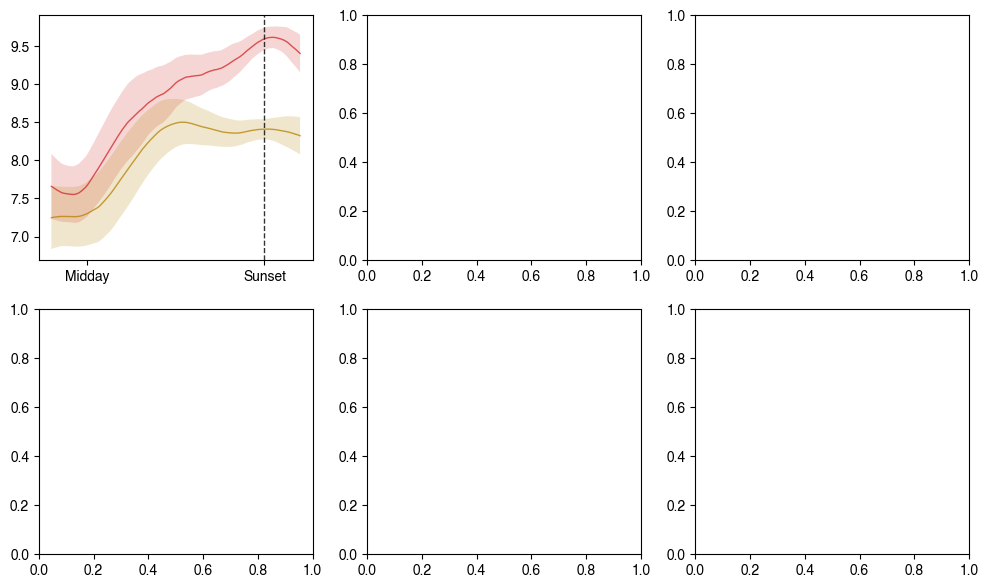

In [10]:
import matplotlib.pyplot as plt

def data_to_fig1(ax, data, low, high):
    """
    Plot single time series with shaded uncertainty range for urban-only precipitation events.
    """
    color = '#2E8B57'  # Dark green
    ax.plot(range(1000), data, color=color, alpha=0.8, linewidth=1,
            label="Precipitation that only\noccurs in Urban Area")
    ax.axvline(856, color="k", linestyle="--", linewidth=1, alpha=0.8)  # Sunset marker
    ax.fill_between(range(1000), low, high, color=color, alpha=0.2, ec="none")

    # X-axis ticks: midday and sunset
    ax.set_xticks([143, 856])
    ax.set_xticklabels(["Midday", "Sunset"])
    _style_xticklabels(ax)

    return ax


def data_to_fig2(ax, data_u, data_r, low_u, high_u, low_r, high_r):
    """
    Plot two time series (Urban vs Rural) with shaded uncertainty ranges.
    """
    color_u = '#D32F2F'  # Red for urban
    color_r = '#B8860B'  # Dark goldenrod for rural
    ax.plot(range(1000), data_u, color=color_u, alpha=0.8, linewidth=1, label="Urban Area")
    ax.plot(range(1000), data_r, color=color_r, alpha=0.8, linewidth=1, label="Rural Area")
    ax.fill_between(range(1000), low_u, high_u, color=color_u, alpha=0.2, ec="none")
    ax.fill_between(range(1000), low_r, high_r, color=color_r, alpha=0.2, ec="none")

    # Vertical line for sunset
    ax.axvline(856, color="k", linestyle="--", linewidth=1, alpha=0.8)

    # X-axis ticks
    ax.set_xticks([143, 856])
    ax.set_xticklabels(["Midday", "Sunset"])
    _style_xticklabels(ax)

    return ax


def _style_xticklabels(ax):
    """
    Helper: Style x-tick labels so 'Sunset' is bold.
    """
    labels = ax.get_xticklabels()
    labels[0].set_color('black')
    labels[1].set_color('black')
    labels[0].set_fontweight('normal')
    labels[1].set_fontweight('bold')


def _set_axis_format(ax, y_ticks, y_lim):
    """
    Helper: Set y-axis ticks, limits, and x-axis limits for all subplots.
    """
    ax.set_yticks(y_ticks, y_ticks)
    ax.set_ylim(y_lim)
    ax.set_xlim(0, 1000)


# ======= Main figure setup =======
fig, axs = plt.subplots(2, 3, figsize=(12, 7))

# First row: urban vs rural comparison
data_to_fig2(axs[0, 0], urban_02_05_mean, rural_02_05_mean,
             urban_02_05_low, urban_02_05_high, rural_02_05_low, rural_02_05_high)
data_to_fig2(axs[0, 1], urban_05_1_mean, rural_05_1_mean,
             urban_05_1_low, urban_05_1_high, rural_05_1_low, rural_05_1_high)
data_to_fig2(axs[0, 2], urban_1_mean, rural_1_mean,
             urban_1_low, urban_1_high, rural_1_low, rural_1_high)

# Second row: urban-only events
data_to_fig1(axs[1, 0], turban_02_05, turban_02_05_low, turban_02_05_high)
data_to_fig1(axs[1, 1], turban_05_1, turban_05_1_low, turban_05_1_high)
data_to_fig1(axs[1, 2], turban_1, turban_1_low, turban_1_high)

# ===== Axis formatting =====
_set_axis_format(axs[0, 0], [6.8, 7.8, 8.8, 9.8], (6.8, 9.8))
_set_axis_format(axs[0, 1], [5, 6, 7, 8], (5, 8))
_set_axis_format(axs[0, 2], [8, 12, 16], (8, 16))
_set_axis_format(axs[1, 0], [2.8, 3.5, 4.2], (2.8, 4.2))
_set_axis_format(axs[1, 1], [0.9, 1.1, 1.3], (0.9, 1.3))
_set_axis_format(axs[1, 2], [0.3, 0.5, 0.7], (0.3, 0.7))

# Y-axis labels
axs[0, 0].set_ylabel("Count of wet hour")
axs[1, 0].set_ylabel("Count of wet hour")

# Legends
axs[0, 2].legend(frameon=False, loc="lower right")
axs[1, 2].legend(frameon=False, loc="lower right")

# ===== Titles and labels =====
dict_title_cfg = dict(fontsize=11, fontweight="heavy", ha="left", fontfamily="Arial")
labels = list("abcdef")
for ax, label in zip(axs.flat, labels):
    ax.text(0.02, 1.02, label, transform=ax.transAxes, **dict_title_cfg)

# Rainfall intensity labels
intensity_labels = ["0.2 - 0.5 mm/hr", "0.5 - 1 mm/hr", "> 1 mm/hr"]
for row in range(2):
    for col, txt in enumerate(intensity_labels):
        axs[row, col].text(0.3, 1.02, txt, transform=axs[row, col].transAxes,
                           fontsize=11, ha="left", fontfamily="Arial")

plt.show()


## Fig S4 (Sptial pattern)

### 
The file spa_{year}.txt contains the latitude, longitude, and urban-rural precipitation difference index (DI) at sunset for the extracted cities in each year.

Column 1: Latitude

Column 2: Longitude

Column 3: DI (calculated as (urban − rural) / rural)

Note: The urban units were extracted using the same method as in previous studies, and since the extraction was performed annually, the number of cities varies from year to year.

Alternative (more concise version):
The spa_{year}.txt file includes the latitude, longitude, and urban-rural precipitation difference index (DI = (urban − rural) / rural) at sunset for the extracted cities each year (Columns 1-3: latitude, longitude, DI).

Note: Urban units were extracted annually using the same method as in prior studies, so the number of cities differs across years.

### 

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.colors import ListedColormap

# ===== Color definitions =====
COLORS = [
    (255/255, 120/255, 130/255),  # Strong negative
    (255/255, 179/255, 186/255),  # Weak negative
    (180/255, 210/255, 100/255),  # Weak positive
    (120/255, 200/255, 150/255)   # Strong positive
]
THRESHOLDS = [-0.1, 0, 0.1]  # Value cutoffs for color mapping


def classify_colors(values):
    """Assign colors based on predefined thresholds."""
    return [
        COLORS[0] if v < THRESHOLDS[0] else
        COLORS[1] if v < THRESHOLDS[1] else
        COLORS[2] if v < THRESHOLDS[2] else
        COLORS[3]
        for v in values
    ]


def plot_spatial(ax, loc):
    """Plot spatial data points with category colors on a basemap."""
    loc = loc[loc[:, 2].argsort()]
    gdf = gpd.GeoDataFrame(
        pd.DataFrame(loc, columns=["lat", "lon", "value"]),
        geometry=gpd.points_from_xy(loc[:, 1], loc[:, 0]),
        crs="EPSG:4326"
    ).to_crs(epsg=3857)

    _ = gdf.plot(ax=ax, markersize=4, c=classify_colors(loc[:, 2]))
    _ = ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.PositronNoLabels, attribution="")

    # Configure ticks and limits
    _ = ax.set_xlim(-18000000, 18000000)
    _ = ax.set_ylim(-8000000, 9000000)
    _ = ax.set_xticks([-18000000, -9000000, 0, 9000000, 18000000], ['-180°', '-90°', '0°', '90°', '180°'])
    _ = ax.set_yticks([-6000000, -3000000, 0, 3000000, 6000000], ['-60°', '-30°', '0°', '30°', '60°'])
    _ = ax.tick_params(bottom=True, left=True, labelbottom=True, labelleft=True)
    return ax


def add_colorbar(ax):
    """Add horizontal colorbar with annotation."""
    sm = plt.cm.ScalarMappable(cmap=ListedColormap(COLORS), norm=plt.Normalize(vmin=0, vmax=100))
    sm.set_array([])
    cbar = ax.figure.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.15, pad=0.1, extend='both')
    cbar.set_label("Urban Impact at Sunset")
    _ = cbar.set_ticks([0, 25, 50, 75, 100])
    _ = cbar.set_ticklabels(["", "-10%", "0", "10%", ""])
    _ = cbar.ax.tick_params(length=0)
    _ = cbar.ax.set_position([0.57, 0.18, 0.3, 0.05])
    _ = ax.set_axis_off()
    _ = ax.text(0.45, 0.53, r'$\frac{P_{Urban} - P_{Rural}}{P_{Rural}} \times 100\%$',
            transform=ax.transAxes, fontsize=12, ha='center', va='center', color='black')
    return cbar


# ===== Main plotting =====
years = [2001, 2005, 2010, 2015, 2020]
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

# Plot all years
for ax, year in zip(axs.flat, years):
    _ = plot_spatial(ax, np.loadtxt(f"spa_{year}.txt"))
    _ = ax.set_title(str(year))

# Subplot labels a–e
for ax, label in zip(axs.flat, list("abcde")):
    _ = ax.text(0.02, 1.02, label, transform=ax.transAxes, fontsize=11, fontweight="heavy", ha="left", fontfamily="Arial")

# Colorbar in last subplot
_ = add_colorbar(axs[2, 1])

plt.tight_layout()
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

b3 = (255/255, 120/255, 130/255)
b4 =  (255/255, 179/255, 186/255)
b5 = (180/255, 210/255, 100/255)
b6 = (120/255, 200/255, 150/255)
def show_colorbar(ax, colors):
    """
    Function to display a custom colorbar on a given axes object (ax).

    Parameters:
    ax: The axes to which the colorbar will be added.
    colors: A list of colors to create the custom colormap.
    """
    # Create the custom colormap
    cmap_custom = ListedColormap(colors)

    # Create a ScalarMappable object for the colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap_custom, norm=plt.Normalize(vmin=0, vmax=100))
    sm.set_array([])  # Empty array for colorbar

    # Create the colorbar
    cbar = ax.figure.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.15, pad=0.1, extend='both')

    # Customize the colorbar
    cbar.set_label("Urban Impact at Sunset")
    _ = cbar.set_ticks([0, 25, 50, 75, 100])
    _ = cbar.set_ticklabels(["", "-10%", "0", "10%", ""])
    _ = cbar.ax.tick_params(length=0)

    _ = cbar.ax.set_position([0.57, 0.18, 0.3, 0.05])
    _ = ax.set_axis_off()
    _ = ax.text(0.45, 0.53,  r'$\frac{P_{Urban} - P_{Rural}}{P_{Rural}} \times 100\%$',
            transform=ax.transAxes, fontsize=12, ha='center', va='center', color='black')
    # Adjust layout to move colorbar up and make it larger
    # plt.subplots_adjust(top=0.55)  # Increase this value to move the colorbar further up

    return cbar


def spatial_show_category_new(ax,loc):
    loc = loc[loc[:, 2].argsort()]
    from matplotlib.colors import ListedColormap
    c_list = []
    for i in range(len(loc[:,2])):
        if loc[i,2]<-0.1:
            c_list.append(b3)
        elif loc[i,2]<0:
            c_list.append(b4)
        elif loc[i,2]<0.1:
            c_list.append(b5)
        else:
            c_list.append(b6)
    df_loc = pd.DataFrame(loc, columns=["lat", "lon","color"])
    gdf_loc = gpd.GeoDataFrame(
        df_loc,
        geometry=gpd.points_from_xy(df_loc.lon, df_loc.lat),
        crs="EPSG:4326"
    ).to_crs(epsg=3857)
    _ = gdf_loc.plot(
        ax=ax,
        markersize=4,
        c=c_list,
        norm=plt.Normalize(vmin=0, vmax=1),
        label = "Studied City",
        )
    _ = ctx.add_basemap(
        ax=ax,
        attribution="",
        source=ctx.providers.CartoDB.PositronNoLabels,
    )
    _ = ax.tick_params(
        axis='both',
        which='both',
        bottom=True,
        left=True,
        labelbottom=True,
        labelleft=True
    )
    _ = ax.autoscale(axis='x')
    w, s, e, n = -18000000, -8000000, 18000000, 9000000
    _ = ax.set_xlim(w, e)
    _ = ax.set_ylim(s, n)
    # Add custom latitude and longitude ticks
    _ = ax.set_xticks([-18000000, -9000000, 0, 9000000, 18000000],['-180\u00b0', '-90\u00b0', '0\u00b0', '90\u00b0', '180\u00b0'])
    _ = ax.set_yticks([-6000000,-3000000, 0, 3000000, 6000000] ,[ '-60\u00b0','-30\u00b0', '0\u00b0', '30\u00b0', '60\u00b0'])
    return ax

fig, axs = plt.subplots(3,2,figsize=(10, 8))
axs[0,0] = spatial_show_category_new(axs[0,0],np.loadtxt(fr"spa_2001.txt"))
axs[0,1] = spatial_show_category_new(axs[0,1],np.loadtxt(fr"spa_2005.txt"))
axs[1,0] = spatial_show_category_new(axs[1,0],np.loadtxt(fr"spa_2010.txt"))
axs[1,1] = spatial_show_category_new(axs[1,1],np.loadtxt(fr"spa_2015.txt"))
axs[2,0] = spatial_show_category_new(axs[2,0],np.loadtxt(fr"spa_2020.txt"))

_ = axs[0,0].set_title("2001")
_ = axs[0,1].set_title("2005")
_ = axs[1,0].set_title("2010")
_ = axs[1,1].set_title("2015")
_ = axs[2,0].set_title("2020")
dict_title_cfg = dict(fontsize=11, fontweight="heavy", ha="left", fontfamily="Arial")
_ = axs[0,0].text(0.02, 1.02, "a", **dict_title_cfg, transform=axs[0,0].transAxes)
_ = axs[0,1].text(0.02, 1.02,"b", **dict_title_cfg, transform=axs[0,1].transAxes)
_ = axs[1,0].text(0.02, 1.02, "c", **dict_title_cfg, transform=axs[1,0].transAxes)
_ = axs[1,1].text(0.02, 1.02, "d", **dict_title_cfg, transform=axs[1,1].transAxes)
_ = axs[2,0].text(0.02, 1.02,"e", **dict_title_cfg, transform=axs[2,0].transAxes)

axs[2,1] = show_colorbar(axs[2,1], [b3,b4,b5,b6])

plt.tight_layout()
plt.show()